<a href="https://colab.research.google.com/github/fatdumplingg/CountryUrgencyLevel-KMeansClustering/blob/main/DataAcquisitionAndExplorationPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA ACQUISITION AND EXPLORATION PRACTICE

> Goal : to show the acquisition of both structured and unstructured data through *web-scraping* and the explorations

> By Sasha Annabel

##PART 1 : ACQUISITION OF STRUCTURED DATA

> Structured data means the data will be taken from a webpage where there is already a neat arrangement of columns and rows for the 'dataset'. An example is the tabular data from a simple Wikipedia page.

> Hence, for the **structured** data, our source is : https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue.

> The goal : to extract information on top companies in the world measured by revenue.

In [ ]:
from bs4 import BeautifulSoup
import requests

> The BeautifulSoup library is used to get the html code of the entire webpage.

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)
#soup contains html info on the entire webpage
soup = BeautifulSoup(page.text, 'html')

> Then, we look for parts of code that contain the key word 'table'.

In [ ]:
#'table' contains html info on the targeted table
table = soup.find_all('table')[1]  #our table is the 2nd table in the page
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

> The tag 'th' will find titles of the columns in all the tables that are found. Please be aware that if there are 2 different tables in the same webpage, this will show **all titles of each columns from both tables**.

In [ ]:
top_titles = table.find_all('th') #finds the titles of each column in the table
top_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

> After cleaning the text, the titles for each column are now obtained.

In [ ]:
table_titles = [title.text.strip() for title in top_titles]
print(table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


> Next step is to put these list of column names (titles) into a dataframe, as seen below.

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns = table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


> The tag 'tr' focuses on each row. And thus, it's the part of extracting the row by row information to be put into the created dataframe.

In [ ]:
column_data = table.find_all('tr')
column_data

[<tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">611,289
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
 </td>
 <td style="text-align:cent

> After getting the sections where there are 'tr' tags, the next steps is to put each of the individual rows into the dataframe.

In [ ]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)
    length = len(df)
    df.loc[length] = individual_row_data

['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington']
['3', 'ExxonMobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas']
['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California']
['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota']
['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island']
['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska']
['8', 'Alphabet', 'Technology and cloud computing', '282,836', '9.8%', '156,000', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas']
['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California']
['11', 'AmerisourceBergen', 'Pharmacy wholes

> Here's the overall version of the dataframe, with data taken from the Wikipedia page!

In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [ ]:
df.to_csv(r'US_Companies_Data.csv', index = False)

###PART 2 : VISUALIZATION / EXPLORATION FOR STRUCTURED DATA

> Now that the acquired information has been translated into a nice dataframe, it's time to extract some meanings from the provided information.

> Assume we would like to know if higher revenue
growth leads to higher number of employees.
> * Create a scatter plot to see (if there is) any relationship (line/curve).

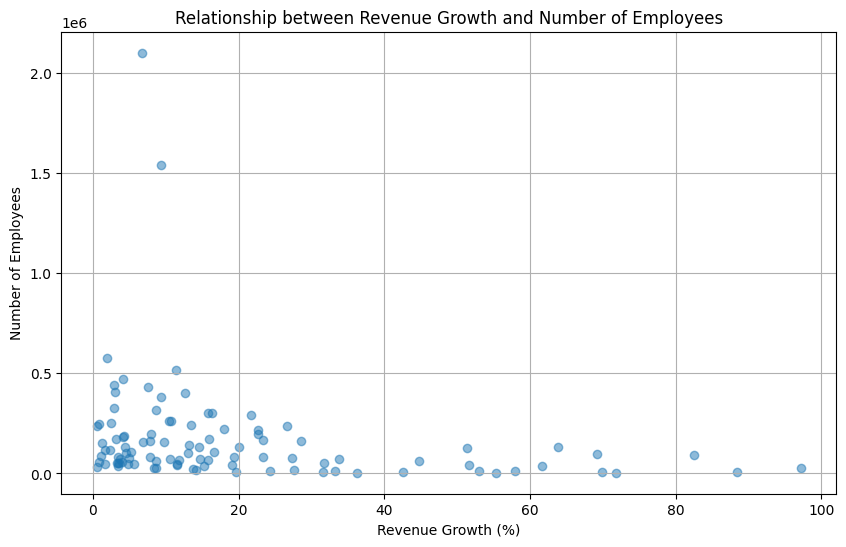

In [ ]:
#to find relationship between revenue growth and number of employees (if any)
import pandas as pd
import matplotlib.pyplot as plt
import re

#cleaning data by converting from string to float values
df['Revenue growth'] = df['Revenue growth'].str.rstrip('%').astype(float)
df['Employees'] = df['Employees'].apply(lambda x: re.sub(r'\[.*\]', '', x)).str.replace(',', '')
df['Employees'] = pd.to_numeric(df['Employees'], errors='coerce')

#=scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Revenue growth'], df['Employees'], alpha=0.5)
plt.title('Relationship between Revenue Growth and Number of Employees')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()


> Results?
> * Revenue has no connection to number of employees (there is no possible curve line to identify any correlation).
> * It can be derived, however, that companies with higher than 20% revenue growth tend to have employees below 250,000.

> Next, assume we would like to know which industry have the most companies that generates more than USD 100,000 in yearly revenue.
> * How many companies on each category generates more than USD 100,000 in yearly revenue?
> * Create a bar chart for quantization of each category.

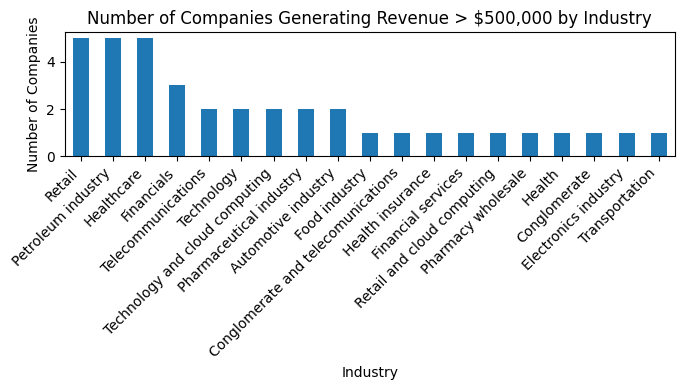

In [ ]:
#to find the indsutries (and num of companies in that industry) with revenue above $100,000
import pandas as pd
import matplotlib.pyplot as plt

#converting revenue from string to numeric data type
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].replace('[\$,]', '', regex=True).astype(float)

#filtering companies with revenue greater than $100,000
df_above_100k = df[df['Revenue (USD millions)'] > 100000]

#counting the number of companies in each industry category
industry_counts = df_above_100k['Industry'].value_counts()

#bar plot
plt.figure(figsize=(7, 4))
industry_counts.plot(kind='bar')
plt.title('Number of Companies Generating Revenue > $500,000 by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> Results?
> * From the list of 100 top U.S. Companies, the industry with the most amount of high revenue earners belong to retail, petroleum industry, and healthcare
> * Accumulatively, there are 38 companies across the industries who have revenue above $500,000 from the list of top 100 U.S. Companies.

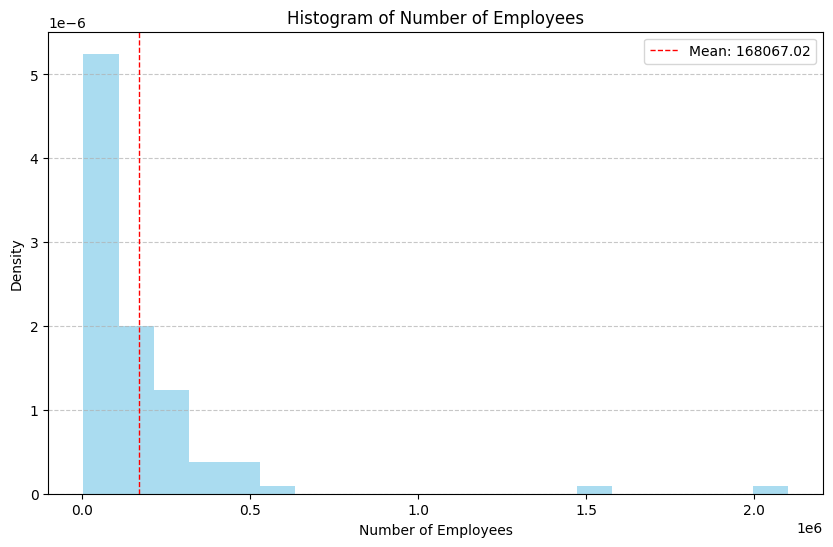

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#converting employees to numeric data type, replacing NaN with 0
#df['Employees'] = pd.to_numeric(df['Employees'].str.replace(',', ''), errors='coerce').fillna(0)

#getting the mean and standard deviation
mean_employees = np.mean(df['Employees'])
std_employees = np.std(df['Employees'])

#creating histogram for employees
plt.figure(figsize=(10, 6))
plt.hist(df['Employees'], bins=20, color='skyblue', alpha=0.7, density=True)
plt.title('Histogram of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#adding mean and distribution information
plt.axvline(mean_employees, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_employees:.2f}')
plt.legend()

plt.show()

##PART 3 : ACQUISITION OF UNSTRUCTURED DATA

> Unstructured data means the data is not organized in a way that column titles or data per rows are visible. Usually, this involves data spread out in different format and at different locations. A prime example is taking lists of products from an Amazon website.

> Hence, for the **unstructured** data, our source is : https://www.amazon.com/s?k=necklace&crid=O685HSW9XUTA&sprefix=necklac%2Caps%2C360&ref=nb_sb_noss_2.

> The goal : extract information on necklace products sold by Amazon (for simmplicity, focusing on first page of search results only).

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

> The information can be extracted step-by-step. First, let's create specific functions that focus on extracting certain parts of information.

> This is necessary because the features are spread out in the entire page in random.

> A process to inspect the html code is still necessary to find where a certain feature (e.g. title, rating, price in this case) is enclosed in which html tags so that it can be found.

In [ ]:
#to extract the title of the product
def get_title(soup):
    try:
        title = soup.find("span", attrs={"id":'productTitle'})
        title_string = title.text.strip()
    except AttributeError:
        title_string = ""
    return title_string

In [ ]:
#to extract the rating of the product
def get_rating(soup):
    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""
    return rating

In [ ]:
#to extract the price of the product (including deals?)
def get_price(soup):
    try:
        price = soup.find("span", attrs={'class':'a-price aok-align-center'}).find("span",
        attrs={'class':'a-offscreen'}).string.strip()
    except AttributeError:
        price = ""
    return price

In [ ]:
#to extract the reviews (if there's any) of the product
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()
    except AttributeError:
        review_count = ""
    return review_count

In [ ]:
#to extract the availability status of the product
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()
    except AttributeError:
        available = "Not Available"
    return available

> After the functions to extract each feature (column in the dataframe) are done, let's call them from the webpage link.

In [ ]:
HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})
URL = "https://www.amazon.com/s?k=necklace&crid=9N7BRW411YLV&sprefix=neckla%2Caps%2C355&ref=nb_sb_noss_2"
webpage = requests.get(URL, headers=HEADERS)

soup = BeautifulSoup(webpage.content, "html.parser")
links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})
links_list = []
for link in links:
      links_list.append(link.get('href'))
d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}

#extract the products from each href link
for link in links_list:
  new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)
  new_soup = BeautifulSoup(new_webpage.content, "html.parser")

  #gets the necessary information per product  and appends it to the list
  d['title'].append(get_title(new_soup))
  d['price'].append(get_price(new_soup))
  d['rating'].append(get_rating(new_soup))
  d['reviews'].append(get_review_count(new_soup))
  d['availability'].append(get_availability(new_soup))

#arranges the dataframe based on the list we have
amazon_df = pd.DataFrame.from_dict(d)
amazon_df['title'].replace('', np.nan, inplace=True)
amazon_df = amazon_df.dropna(subset=['title'])
amazon_df.to_csv("amazon_data.csv", header=True, index=False)

> Here's what the final dataframe would look like. Do note that some of the values, such as some in the 'Price' column, are null (not found from the webpage).

> The cause of this is perhaps the fact that some items have special discounted prices, in which they would be enclosed in different html tags or organized differently within the html code.

In [ ]:
amazon_df

,title,price,rating,reviews,availability
0,"Kendra Scott Elisa Pendant Necklace for Women,...",$46.75,4.6 out of 5 stars,"14,827 ratings",In Stock
1,"Tewiky Diamond Necklaces for Women, Dainty Gol...",$13.42,4.4 out of 5 stars,"2,769 ratings",In Stock
2,PAVOI 14K Gold Plated Cubic Zirconia Cross Nec...,$12.95,4.4 out of 5 stars,"10,692 ratings",In Stock
3,PAVOI 14K Gold Plated Gemstone Pendant Necklac...,$13.95,4.5 out of 5 stars,132 ratings,In Stock
4,MEVECCO Layered Heart Necklace Pendant Handmad...,$13.99,4.5 out of 5 stars,"22,541 ratings",In Stock
5,M MOOHAM Dainty Gold Necklace for Women - 14K ...,,4.5 out of 5 stars,"40,872 ratings",Not Available
6,"Gold Pearl Necklace, Dainty Gold Necklaces Pro...",$9.99,4.6 out of 5 stars,292,In Stock
7,FUNEIA Diamond Necklaces for Women 14K Gold Pl...,$9.98,4.5 out of 5 stars,202 ratings,In Stock
8,PAVOI 14K Gold Plated Cubic Zirconia Heart Nec...,$13.95,4.4 out of 5 stars,"7,518 ratings",In Stock
10,PAVOI 14K Gold Plated Post Faux Diamond Round ...,,4.5 out of 5 stars,"4,147 ratings",Not Available


###PART 4 : VISUALIZATION / EXPLORATION FOR UNSTRUCTURED DATA

> Assume we would like to know the proportions of ratings for all necklaces found in the first page results of Amazon.
> * Are there more necklaces with 4.4 ratings? Or
perhaps 4.6? Are there any ratings below 2 stars?
> * Apply pie chart for ratio comparison

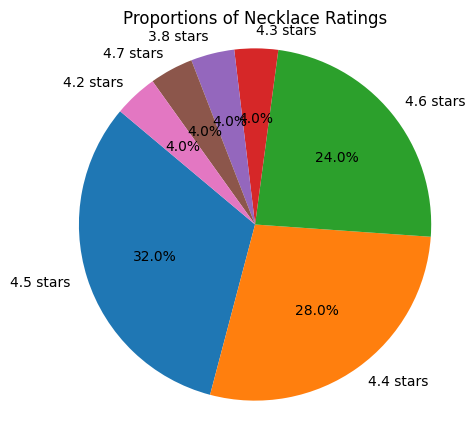

In [ ]:
#to find ratios of ratings of all necklaces in Amazon's first page results
import pandas as pd
import matplotlib.pyplot as plt

#converting the 'rating' column from string datatype to extract numeric ratings
amazon_df['rating'] = amazon_df['rating'].str.extract('(\d+\.\d+|\d+)').astype(float)

#calculating proportions of each rating category
rating_counts = amazon_df['rating'].value_counts(normalize=True)

#pie plot
plt.figure(figsize=(5,5))
plt.pie(rating_counts, labels=rating_counts.index.map(lambda x: str(x) + ' stars'), autopct='%1.1f%%',
        startangle=140)
plt.title('Proportions of Necklace Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

> Results?
> * Nearly 40% of the necklace products that show up in Amazon’s first search page results have 4.5 star rating.
> * Only about 4.2% of the necklace products have ratings below 4.0 stars, and there are none below 3.7 stars.

> Assume we would like to ‘group’ the necklaces based on newly-created price categories for simplicity.
> * How many necklaces are priced below USD 10, above USD 35, or in between?
> * Use bar chart for quantization.

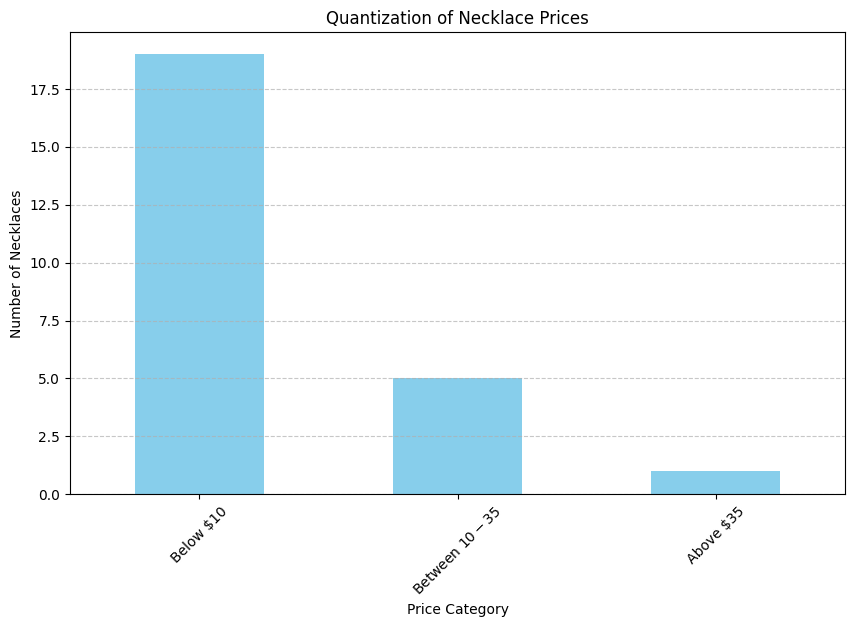

In [ ]:
#to find number of necklaces that are cheap, mid-priced, and expensive
import pandas as pd
import matplotlib.pyplot as plt

#converting price to numeric data type, replacing NaN with 0 (cleaning data from errors)
amazon_df['price'] = pd.to_numeric(amazon_df['price'].replace('[\$,]', '', regex=True),
                                   errors='coerce').fillna(0)

#defining price categories and their thresholds, then create the columns
price_categories = ['Below $10', 'Between $10-$35', 'Above $35']
price_thresholds = [0, 10, 35, float('inf')]
amazon_df['price_category'] = pd.cut(amazon_df['price'], bins=price_thresholds,
                                     labels=price_categories, right=False)

#counting the number of necklaces in each price category
price_category_counts = amazon_df['price_category'].value_counts()

#bar plot
plt.figure(figsize=(10, 6))
price_category_counts.plot(kind='bar', color='skyblue')
plt.title('Quantization of Necklace Prices')
plt.xlabel('Price Category')
plt.ylabel('Number of Necklaces')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> Results
> * More than 50% of necklace products in Amazon’s first page results are priced between  USD 10 - USD 35.
> * This can mean that online customers love mid-priced products, as these products appear in the first page search results (whether for their quality,
etc.).
> * There are about the same number of necklaces below
USD 10 and above USD 35, which are 9 each.

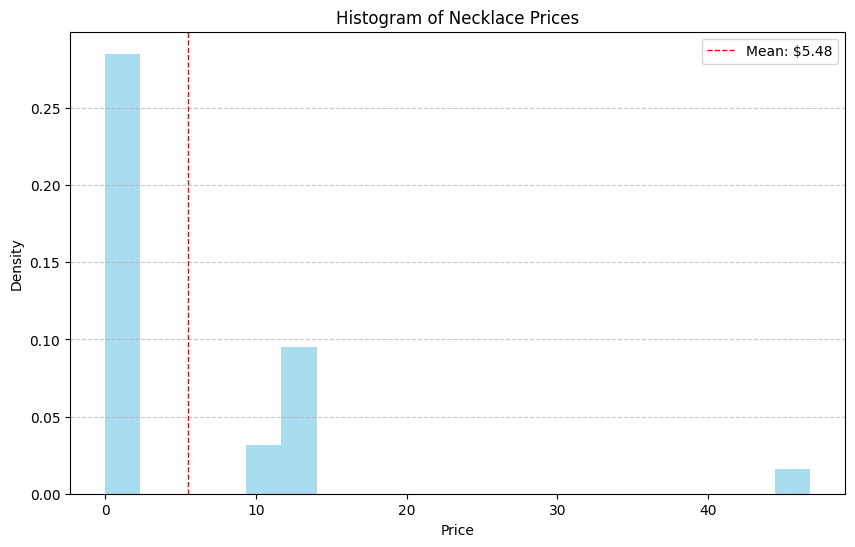

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#converting price to numeric data type, replacing NaN with 0
amazon_df['price'] = pd.to_numeric(amazon_df['price'].replace('[\$,]', '', regex=True), errors='coerce').fillna(0)

#calculating mean and standard deviation
mean_price = amazon_df['price'].mean()
std_price = amazon_df['price'].std()

#creating histogram for necklace prices
plt.figure(figsize=(10, 6))
plt.hist(amazon_df['price'], bins=20, color='skyblue', alpha=0.7, density=True)
plt.title('Histogram of Necklace Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#adding mean and distribution information
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: ${mean_price:.2f}')
plt.legend()

plt.show()